# FRAUD DETECTION PROJECT

## PROJECT OVERVIEW

- The project is about fraud detection.

## BUSINESS UNDERSTANDING

## DATA UNDERSTANDING

* The data was sourced from [Kaggle](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset/data)
* The dataset contains the following variables:
   - **Transaction_ID**-Unique identifier for each transaction
   - **User_ID**-Unique identifier for the user
   - **Transaction_Amount**-Amount of money involved in the transaction
   - **Transaction_Type**-Type of transaction (Online, In-Store, ATM, etc.)
   - **Timestamp**-Date and time of the transaction
   - **Account_Balance**-User's current account balance before the transaction
   - **Device_Type**-Type of device used (Mobile, Desktop, etc.)
   - **Location**-Geographical location of the transaction
   - **Merchant_Category**-Type of merchant (Retail, Food, Travel, etc.)
   - **IP_Address_Flag**-Whether the IP address was flagged as suspicious (0 or 1)
   - **Previous_Fraudulent_Activity**-Number of past fraudulent activities by the user
   - **Daily_Transaction_Count**-Number of transactions made by the user that day
   - **Avg_Transaction_Amount_7d**-User's average transaction amount in the past 7 days
   - **Failed_Transaction_Count_7d**-Count of failed transactions in the past 7 days
   - **Card_Type**-Type of payment card used (Credit, Debit, Prepaid, etc.)
   - **Card_Age**-Age of the card in months
   - **Transaction_Distance**-Distance between the user's usual location and transaction location
   - **Authentication_Method**-How the user authenticated (PIN, Biometric, etc.)
   - **Risk_Score**-Fraud risk score computed for the transaction
   - **Is_Weekend**-Whether the transaction occurred on a weekend (0 or 1)
   - **Fraud_Label**-Target variable (0 = Not Fraud, 1 = Fraud)

### DATA READING

In [10]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Load and Read the first five rows of the data
data = pd.read_csv('synthetic_fraud_dataset.csv')

data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


## DATA CLEANING AND PREPARATION


In [7]:
#Discover and handle missing values
data.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [11]:
# discover and handle duplicates
data.duplicated().sum()

0

In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

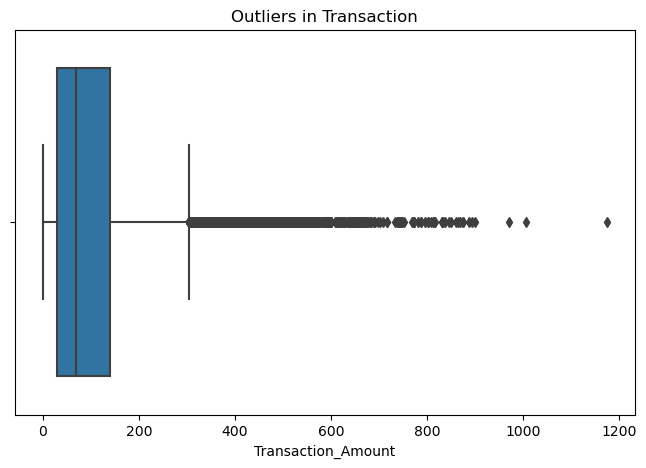

In [15]:
#Handle Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Transaction_Amount'])
plt.title('Outliers in Transaction')
plt.show()

In [17]:
#Handle Outliers
# Removing outliers using the IQR method
Q1 = data['Transaction_Amount']
Q3 = data['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (data['Transaction_Amount'] >= (Q1 - 1.5 * IQR)) & \
                   (data['Transaction_Amount'] <= (Q3 + 1.5 * IQR))
data = data[filter_outliers].reset_index(drop=True)

## EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS

* We will analyze the following visualizations.
   * **Target Variable Analysis**
   * **Univariate Analysis**
   * **Bivariate Analysis**
   * **Multivariate Analysis**

#### **Target Variable Analysis**

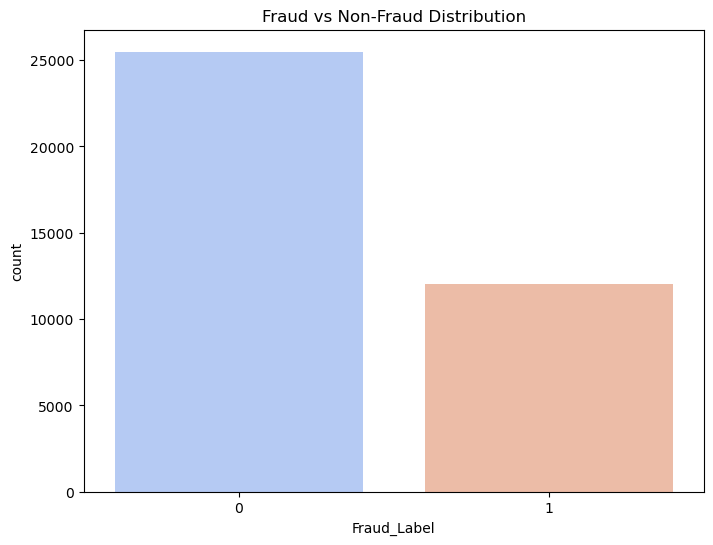

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Fraud_Label',data=data,palette='coolwarm')
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

**Findings**
* There is class imbalance because **0:Not Fraud** is overrepresented and **1:Fraud** is underrepresented.

#### **Univariate Analysis**

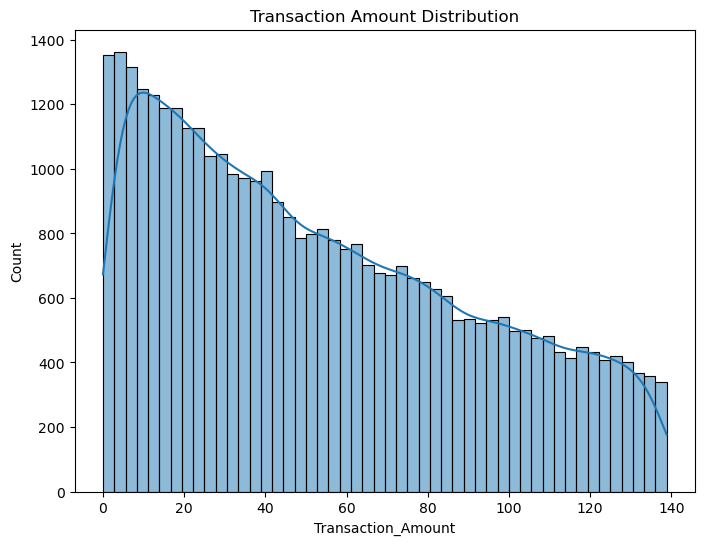

In [21]:
#Transaction Amount
plt.figure(figsize=(8,6))
sns.histplot(data['Transaction_Amount'],bins=50,kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

**Findings**
* The transaction amount is not distributed well.

#### Bivariate Analysis

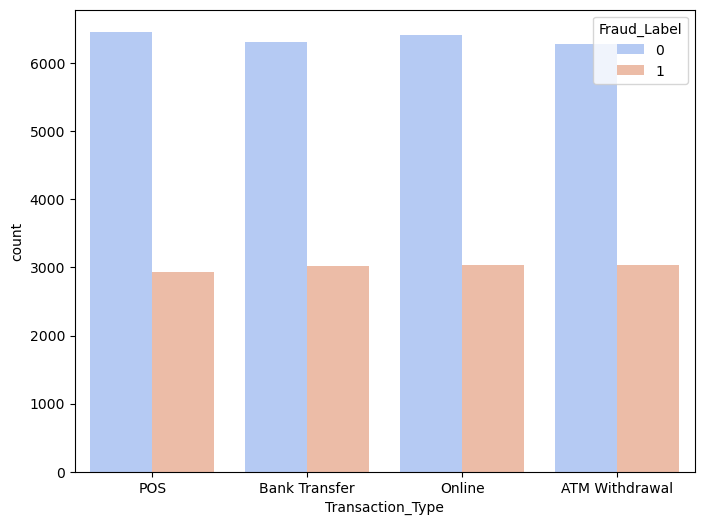

In [22]:
#Fraud Label Vs Transaction Type
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Transaction_Type',hue='Fraud_Label',palette='coolwarm')
plt.title('')
plt.show()

#### Multivariate Analysis

In [23]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Feature Correlations')
plt.show()

ValueError: could not convert string to float: 'TXN_33553'

<Figure size 800x600 with 0 Axes>

## MODEL TRAINING

**We will train these 3 models:**
   - Logistic Regression
   - Random Forest
   - XGBoost

In [25]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [30]:
# prepare data
X = data.drop(columns=['Fraud_Label','Transaction_ID','User_ID'])
y = data('Fraud_Label')
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TypeError: 'DataFrame' object is not callable

In [31]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

NameError: name 'X_train' is not defined